In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [133]:
dataku=pd.read_csv("Mall_Customers.csv",usecols=['Annual Income (k$)','Spending Score (1-100)'])
dataku.head()



,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [134]:
dataku.shape

(200, 2)

In [135]:
dataku.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [136]:
dataku.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Univariate Annual Income (k$)
# Melihat distribusi dari Annual Income (k$)

<AxesSubplot:ylabel='Density'>

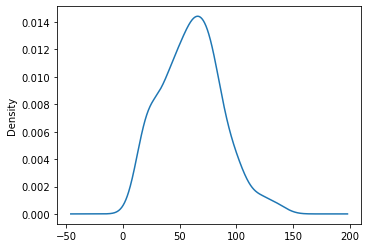

In [137]:
Annuaal=plt.figure(figsize=(12,4))

# KDE
Annuaal.add_subplot(1,2,1)
dataku['Annual Income (k$)'].plot(kind='kde')



# pada Data diatas bahwa mean dan median Annual income terpusat di sekitar nilai 50

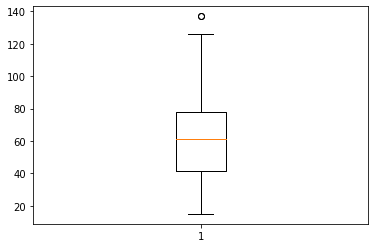

In [138]:
Annuaal.add_subplot(1,2,1)
plt.boxplot(dataku['Annual Income (k$)'])
plt.show()

# Univariate Annual Spending score
# Melihat distribusi dari Spending score

# pada data diatas terdapat 1 outlier

<AxesSubplot:ylabel='Density'>

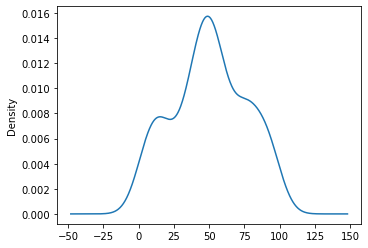

In [139]:
# Spending Score (1-100)

Spending=plt.figure(figsize=(12,4))

# KDE
Spending.add_subplot(1,2,1)
dataku['Spending Score (1-100)'].plot(kind='kde')


# pada Data diatas bahwa mean dan median Spending score terpusat di sekitar nilai 50

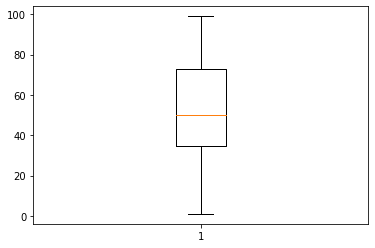

In [140]:
Spending.add_subplot(1,2,1)
plt.boxplot(dataku['Spending Score (1-100)'])
plt.show()

# data Spending score tidak mempunya outlier

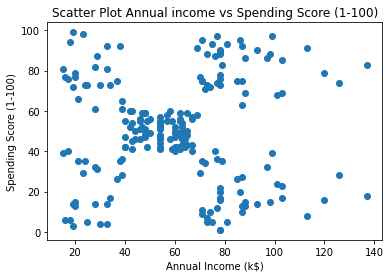

In [141]:
#Bivariate analysis Annual income dan Spending score.
#Menggunakan scatter plot.
plt.scatter(dataku['Annual Income (k$)'], dataku['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot Annual income vs Spending Score (1-100)')
plt.show()

In [142]:
dataku.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


In [143]:
dataX=dataku['Annual Income (k$)'].values.reshape(-1,1)
dataY=dataku['Spending Score (1-100)'].values.reshape(-1,1)


In [144]:
# split data 80:20
dataX_train,dataX_test,dataY_train,dataY_test =train_test_split(dataX,dataY,test_size=0.2) 

In [145]:
lin_reg=LinearRegression()

In [146]:
lin_reg.fit(dataX_train,dataY_train)

LinearRegression()

In [147]:
print("Annual income",lin_reg.coef_)
print("Spending score",lin_reg.intercept_)

Annual income [[-0.06616405]]
Spending score [54.3033387]


In [148]:
# data diatas menghasilkan m=0.0097365 , nlai b=49.61035766
lin_reg.score(dataX_test,dataY_test)

-0.051623904414456856

Text(0.5, 1.0, 'Plot Annual income vs Spending score')

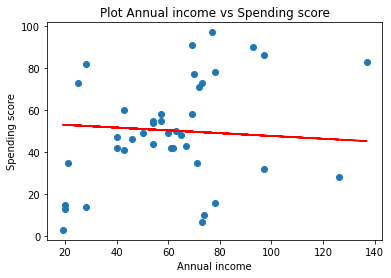

In [149]:
dataY_prediksi=lin_reg.predict(dataX_test)
plt.scatter(dataX_test,dataY_test)
plt.plot(dataX_test,dataY_prediksi,c='r')
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Plot Annual income vs Spending score")

In [150]:
lin_reg.predict([[150]])
# Spending score dengan pendapatan 150 maka menghasilkan spending score predik 59,55%

array([[44.37873083]])

In [151]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 Score:",r2_score(dataY_test,dataY_prediksi))
print("Mean absolute:",mean_absolute_error(dataY_test,dataY_prediksi))
print("Mean absolute:",mean_squared_error(dataY_test,dataY_prediksi))


r2 Score: -0.051623904414456856
Mean absolute: 20.188738140857218
Mean absolute: 645.5498499638585
